# Parnian Taheri
## Deep Learning
### Homework 3 - Q3

## Part A

MobileNetV2 is a lightweight, efficient deep learning model, designed for devices with limited computational resources.Key components of its architecture include:

- Depthwise Separable Convolutions: Efficient convolution layers split into depthwise and pointwise convolutions, reducing computation.
- Bottleneck Blocks: Layers that reduce dimensionality to compress features before expanding them for efficient feature representation.
- Inverted Residual Connections: Skip connections between layers when input and output dimensions match, improving gradient flow while minimizing computations.
- Final Fully Connected Layer: Maps features to 1000 ImageNet classes.

Input Dimensions: (batch_size,3,224,224)

Preprocessing:
To use the pretrained model, the input image must be resized to 224×224 pixels.
Then it should be converted to a PyTorch tensor. Finally, it should be normalized using the mean and standard deviation.

The output is a 2D tensor of shape:
- Batch Size: Matches the input batch size.
- Classes: 1000 (ImageNet class probabilities).
- Shape: (batch_size,1000).


In [1]:
import torch
import torchvision.models as models
from torchvision import models, transforms, datasets
from PIL import Image
import requests
import matplotlib.pyplot as plt
from torch import nn, optim
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from tqdm import tqdm


In [3]:
mobilenet_v2 = models.mobilenet_v2(pretrained=True)

mobilenet_v2.eval()

print(mobilenet_v2)

preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

input_tensor = torch.randn(1, 3, 224, 224)
output = mobilenet_v2(input_tensor)
print("Input Shape:", input_tensor.shape)
print("Output Shape:", output.shape)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 161MB/s]


MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Top 3 Predicted Classes:
1. pug (99.15%)
2. Bullmastiff (0.44%)
3. French Bulldog (0.29%)


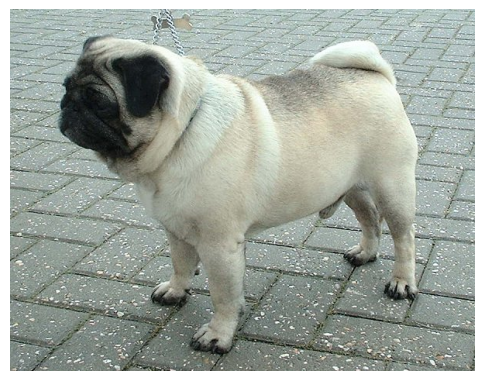

In [9]:
mobilenet_v2 = models.mobilenet_v2(pretrained=True)
mobilenet_v2.eval()

preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

# Load an example image
url = "https://upload.wikimedia.org/wikipedia/commons/9/9a/Pug_600.jpg"
response = requests.get(url, stream=True)
img = Image.open(response.raw).convert('RGB')

input_tensor = preprocess(img).unsqueeze(0)

with torch.no_grad():
    output = mobilenet_v2(input_tensor)

# Load ImageNet class labels
imagenet_classes_url = "https://raw.githubusercontent.com/anishathalye/imagenet-simple-labels/master/imagenet-simple-labels.json"
imagenet_classes = requests.get(imagenet_classes_url).json()

# Get top 3 predictions
probabilities = torch.nn.functional.softmax(output[0], dim=0)
top3_indices = torch.topk(probabilities, 3).indices.tolist()
top3_labels = [imagenet_classes[idx] for idx in top3_indices]

print("Top 3 Predicted Classes:")
for rank, (label, prob) in enumerate(zip(top3_labels, probabilities[top3_indices]), 1):
    print(f"{rank}. {label} ({prob:.2%})")

# plot
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis('off')
plt.show()

## Part C

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the Oxford 102 Flower dataset
train_data = datasets.Flowers102(
    root='./data',
    split='train',
    download=True,
    transform=transform
)
val_data = datasets.Flowers102(
    root='./data',
    split='val',
    download=True,
    transform=transform
)
test_data = datasets.Flowers102(
    root='./data',
    split='test',
    download=True,
    transform=transform
)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

100%|██████████| 345M/345M [00:14<00:00, 24.0MB/s]


Extracting data/flowers-102/102flowers.tgz to data/flowers-102


100%|██████████| 502/502 [00:00<00:00, 353kB/s]


100%|██████████| 15.0k/15.0k [00:00<00:00, 16.6MB/s]


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 159MB/s]



Epoch 1/10


Validation: 100%|██████████| 32/32 [00:06<00:00,  4.87batch/s]


Train Loss: 4.3516, Train Acc: 0.1216, Val Loss: 3.2789, Val Acc: 0.3775

Epoch 2/10


Validation: 100%|██████████| 32/32 [00:07<00:00,  4.44batch/s]


Train Loss: 2.4160, Train Acc: 0.6706, Val Loss: 2.1384, Val Acc: 0.7000

Epoch 3/10


Validation: 100%|██████████| 32/32 [00:07<00:00,  4.53batch/s]


Train Loss: 1.4092, Train Acc: 0.8706, Val Loss: 1.5448, Val Acc: 0.7814

Epoch 4/10


Validation: 100%|██████████| 32/32 [00:07<00:00,  4.18batch/s]


Train Loss: 0.8572, Train Acc: 0.9382, Val Loss: 1.2643, Val Acc: 0.8127

Epoch 5/10


Validation: 100%|██████████| 32/32 [00:07<00:00,  4.51batch/s]


Train Loss: 0.5984, Train Acc: 0.9716, Val Loss: 1.0695, Val Acc: 0.8353

Epoch 6/10


Validation: 100%|██████████| 32/32 [00:06<00:00,  4.62batch/s]


Train Loss: 0.4347, Train Acc: 0.9843, Val Loss: 0.9731, Val Acc: 0.8382

Epoch 7/10


Validation: 100%|██████████| 32/32 [00:06<00:00,  5.02batch/s]


Train Loss: 0.3190, Train Acc: 0.9882, Val Loss: 0.8846, Val Acc: 0.8392

Epoch 8/10


Validation: 100%|██████████| 32/32 [00:10<00:00,  3.16batch/s]


Train Loss: 0.2433, Train Acc: 0.9971, Val Loss: 0.8234, Val Acc: 0.8490

Epoch 9/10


Validation: 100%|██████████| 32/32 [00:07<00:00,  4.52batch/s]


Train Loss: 0.2002, Train Acc: 0.9971, Val Loss: 0.7800, Val Acc: 0.8559

Epoch 10/10


Validation: 100%|██████████| 32/32 [00:09<00:00,  3.34batch/s]


Train Loss: 0.1633, Train Acc: 0.9990, Val Loss: 0.7499, Val Acc: 0.8559


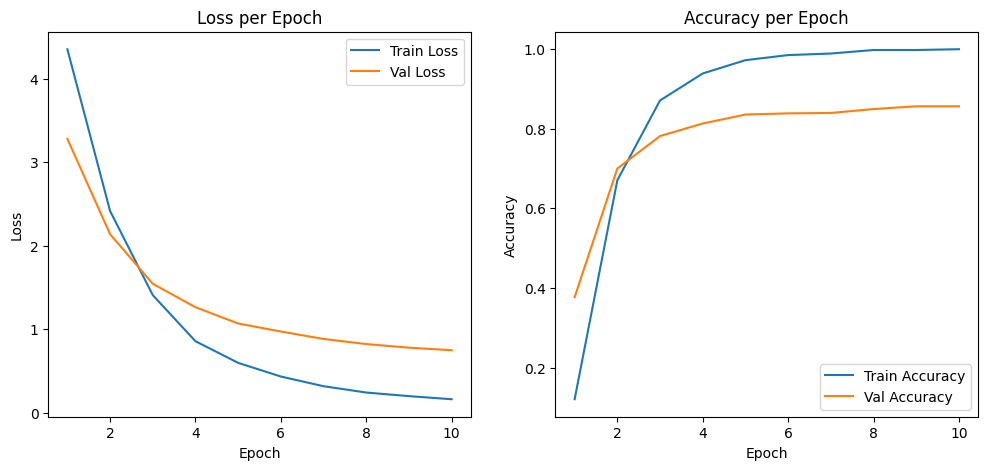

In [3]:
mobilenet_v2 = models.mobilenet_v2(pretrained=True)

# Freeze feature extraction layers
for param in mobilenet_v2.features.parameters():
    param.requires_grad = False

num_classes = 102
mobilenet_v2.classifier[1] = nn.Linear(mobilenet_v2.last_channel, num_classes)

model = mobilenet_v2.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.classifier.parameters(), lr=0.001)

epochs = 10
train_loss = []
val_loss = []
train_acc = []
val_acc = []

for epoch in range(epochs):
    model.train()
    epoch_train_loss = 0
    correct_train = 0
    print(f"\nEpoch {epoch+1}/{epochs}")

    with tqdm(total=len(train_loader), desc="Training", unit="batch") as pbar:
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_train_loss += loss.item()
            correct_train += (outputs.argmax(dim=1) == labels).sum().item()
            pbar.update(1)
            pbar.set_postfix(loss=loss.item())

    train_loss.append(epoch_train_loss / len(train_loader))
    train_acc.append(correct_train / len(train_data))

    model.eval()
    epoch_val_loss, correct_val = 0, 0
    with torch.no_grad():
        with tqdm(total=len(val_loader), desc="Validation", unit="batch") as pbar:
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                epoch_val_loss += loss.item()
                correct_val += (outputs.argmax(dim=1) == labels).sum().item()
                pbar.update(1)

    val_loss.append(epoch_val_loss / len(val_loader))
    val_acc.append(correct_val / len(val_data))

    print(f"Train Loss: {train_loss[-1]:.4f}, Train Acc: {train_acc[-1]:.4f}, Val Loss: {val_loss[-1]:.4f}, Val Acc: {val_acc[-1]:.4f}")

# Plot accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), train_loss, label='Train Loss')
plt.plot(range(1, epochs+1), val_loss, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss per Epoch')

plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), train_acc, label='Train Accuracy')
plt.plot(range(1, epochs+1), val_acc, label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy per Epoch')

plt.show()


In [4]:
def evaluate(loader, dataset_name):
    model.eval()
    total_loss = 0
    correct = 0
    with torch.no_grad():
        with tqdm(total=len(loader), desc=f"Evaluating {dataset_name}", unit="batch") as pbar:
            for images, labels in loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                total_loss += loss.item()
                correct += (outputs.argmax(dim=1) == labels).sum().item()
                pbar.update(1)

    avg_loss = total_loss / len(loader)
    accuracy = correct / len(loader.dataset)
    print(f"{dataset_name} Loss: {avg_loss:.4f}, Accuracy: {accuracy:.4f}")

evaluate(train_loader, "Training")
evaluate(val_loader, "Validation")
evaluate(test_loader, "Test")

Evaluating Training: 100%|██████████| 32/32 [00:07<00:00,  4.44batch/s]


Training Loss: 0.0821, Accuracy: 1.0000


Evaluating Validation: 100%|██████████| 32/32 [00:06<00:00,  4.83batch/s]


Validation Loss: 0.7499, Accuracy: 0.8559


Evaluating Test: 100%|██████████| 193/193 [00:44<00:00,  4.31batch/s]

Test Loss: 0.8180, Accuracy: 0.8414


## Part D

In [10]:
def count_parameters(model):
    total_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    return total_params, trainable_params

def train_and_evaluate(model, train_loader, val_loader, epochs, lr, num_classes):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=lr)
    train_loss = []
    val_loss = []
    train_acc = []
    val_acc = []

    for epoch in range(epochs):
        model.train()
        epoch_train_loss = 0
        correct_train = 0
        with tqdm(total=len(train_loader), desc=f"Training Epoch {epoch+1}/{epochs}", unit="batch") as pbar:
            for images, labels in train_loader:
                images, labels = images.to(device), labels.to(device)
                optimizer.zero_grad()
                outputs = model(images)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                epoch_train_loss += loss.item()
                correct_train += (outputs.argmax(dim=1) == labels).sum().item()
                pbar.update(1)

        train_loss.append(epoch_train_loss / len(train_loader))
        train_acc.append(correct_train / len(train_loader.dataset))

        # Validation
        model.eval()
        epoch_val_loss = 0
        correct_val = 0
        with torch.no_grad():
            with tqdm(total=len(val_loader), desc="Validation", unit="batch") as pbar:
                for images, labels in val_loader:
                    images, labels = images.to(device), labels.to(device)
                    outputs = model(images)
                    loss = criterion(outputs, labels)
                    epoch_val_loss += loss.item()
                    correct_val += (outputs.argmax(dim=1) == labels).sum().item()
                    pbar.update(1)

        val_loss.append(epoch_val_loss / len(val_loader))
        val_acc.append(correct_val / len(val_loader.dataset))

        print(f"Epoch {epoch+1}: Train Loss {train_loss[-1]:.4f}, Train Acc {train_acc[-1]:.4f}, Val Loss {val_loss[-1]:.4f}, Val Acc {val_acc[-1]:.4f}")

    # Plot
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(1, epochs+1), train_loss, label="Train Loss")
    plt.plot(range(1, epochs+1), val_loss, label="Val Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Loss During Training")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(1, epochs+1), train_acc, label="Train Accuracy")
    plt.plot(range(1, epochs+1), val_acc, label="Val Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("Accuracy During Training")
    plt.legend()

    plt.tight_layout()
    plt.show()

    return train_loss, val_loss, train_acc, val_acc


### VGG16

VGG16: Total Parameters: 134678438, Trainable Parameters: 119963750


Validation: 100%|██████████| 32/32 [00:09<00:00,  3.28batch/s]


Epoch 1: Train Loss 4.6704, Train Acc 0.0500, Val Loss 4.0153, Val Acc 0.1245


Validation: 100%|██████████| 32/32 [00:10<00:00,  3.06batch/s]


Epoch 2: Train Loss 3.5708, Train Acc 0.1804, Val Loss 2.7462, Val Acc 0.3578


Validation: 100%|██████████| 32/32 [00:11<00:00,  2.90batch/s]


Epoch 3: Train Loss 2.2295, Train Acc 0.4441, Val Loss 2.0859, Val Acc 0.4814


Validation: 100%|██████████| 32/32 [00:10<00:00,  3.11batch/s]


Epoch 4: Train Loss 1.1512, Train Acc 0.7059, Val Loss 1.6577, Val Acc 0.5490


Validation: 100%|██████████| 32/32 [00:10<00:00,  3.01batch/s]


Epoch 5: Train Loss 0.6944, Train Acc 0.8167, Val Loss 1.6879, Val Acc 0.5647


Validation: 100%|██████████| 32/32 [00:11<00:00,  2.73batch/s]


Epoch 6: Train Loss 0.5433, Train Acc 0.8608, Val Loss 2.0328, Val Acc 0.5127


Validation: 100%|██████████| 32/32 [00:10<00:00,  3.01batch/s]


Epoch 7: Train Loss 0.4035, Train Acc 0.9029, Val Loss 1.8688, Val Acc 0.5667


Validation: 100%|██████████| 32/32 [00:10<00:00,  2.96batch/s]


Epoch 8: Train Loss 0.3989, Train Acc 0.9127, Val Loss 1.9465, Val Acc 0.5725


Validation: 100%|██████████| 32/32 [00:11<00:00,  2.80batch/s]


Epoch 9: Train Loss 0.6768, Train Acc 0.8902, Val Loss 2.4541, Val Acc 0.5265


Validation: 100%|██████████| 32/32 [00:10<00:00,  3.00batch/s]


Epoch 10: Train Loss 0.6181, Train Acc 0.9059, Val Loss 2.9897, Val Acc 0.5108


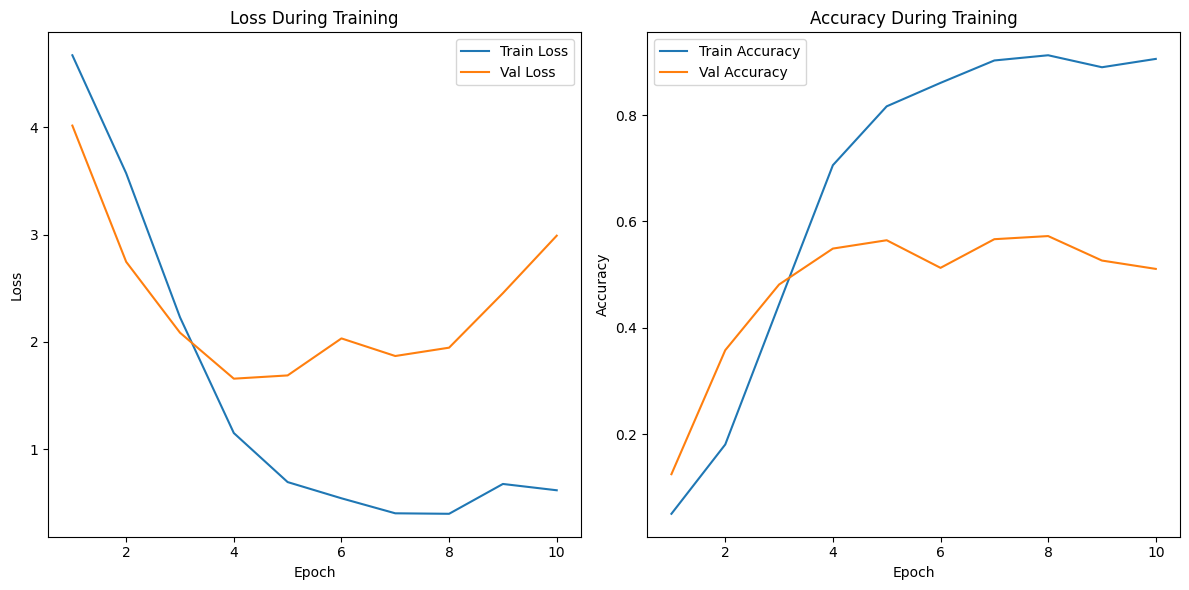

In [8]:
vgg16 = models.vgg16(pretrained=True)

for param in vgg16.features.parameters():
    param.requires_grad = False

vgg16.classifier[6] = nn.Linear(4096, 102)

vgg16_total_params, vgg16_trainable_params = count_parameters(vgg16)
print(f"VGG16: Total Parameters: {vgg16_total_params}, Trainable Parameters: {vgg16_trainable_params}")

# Train and evaluate
vgg16_train_loss, vgg16_val_loss, vgg16_train_acc, vgg16_val_acc = train_and_evaluate(
    vgg16, train_loader, val_loader, epochs=10, lr=0.001, num_classes=102
)

### ResNet50

ResNet50: Total Parameters: 23717030, Trainable Parameters: 208998


Validation: 100%|██████████| 32/32 [00:08<00:00,  3.72batch/s]


Epoch 1: Train Loss 4.6670, Train Acc 0.0667, Val Loss 3.4926, Val Acc 0.3176


Validation: 100%|██████████| 32/32 [00:10<00:00,  3.02batch/s]


Epoch 2: Train Loss 2.6892, Train Acc 0.5520, Val Loss 2.3640, Val Acc 0.6039


Validation: 100%|██████████| 32/32 [00:08<00:00,  3.85batch/s]


Epoch 3: Train Loss 1.5765, Train Acc 0.7912, Val Loss 1.7481, Val Acc 0.7049


Validation: 100%|██████████| 32/32 [00:10<00:00,  3.18batch/s]


Epoch 4: Train Loss 0.9900, Train Acc 0.9108, Val Loss 1.4231, Val Acc 0.7490


Validation: 100%|██████████| 32/32 [00:08<00:00,  3.96batch/s]


Epoch 5: Train Loss 0.6565, Train Acc 0.9578, Val Loss 1.1770, Val Acc 0.7892


Validation: 100%|██████████| 32/32 [00:08<00:00,  3.86batch/s]


Epoch 6: Train Loss 0.4879, Train Acc 0.9637, Val Loss 1.0432, Val Acc 0.8314


Validation: 100%|██████████| 32/32 [00:07<00:00,  4.07batch/s]


Epoch 7: Train Loss 0.3543, Train Acc 0.9902, Val Loss 0.9245, Val Acc 0.8500


Validation: 100%|██████████| 32/32 [00:08<00:00,  3.95batch/s]


Epoch 8: Train Loss 0.2653, Train Acc 0.9941, Val Loss 0.8991, Val Acc 0.8333


Validation: 100%|██████████| 32/32 [00:08<00:00,  3.78batch/s]


Epoch 9: Train Loss 0.2192, Train Acc 0.9971, Val Loss 0.8152, Val Acc 0.8549


Validation: 100%|██████████| 32/32 [00:08<00:00,  3.94batch/s]


Epoch 10: Train Loss 0.1760, Train Acc 0.9980, Val Loss 0.7817, Val Acc 0.8471


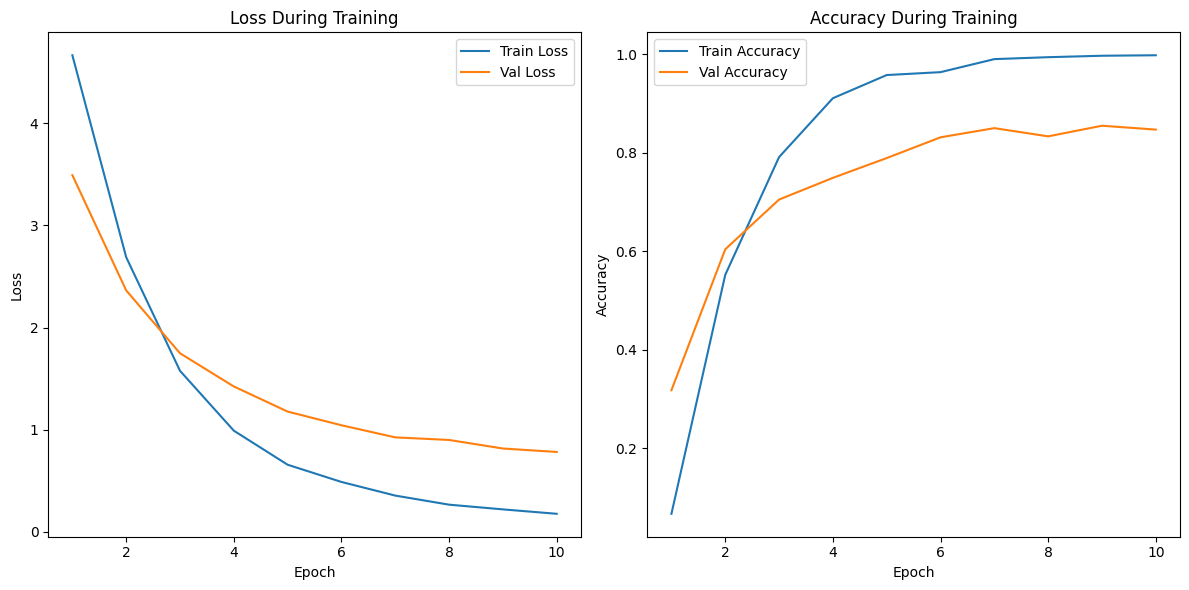

In [11]:
resnet50 = models.resnet50(pretrained=True)

for param in resnet50.parameters():
    param.requires_grad = False

resnet50.fc = nn.Linear(resnet50.fc.in_features, 102)

resnet50_total_params, resnet50_trainable_params = count_parameters(resnet50)
print(f"ResNet50: Total Parameters: {resnet50_total_params}, Trainable Parameters: {resnet50_trainable_params}")

# Train and evaluate
resnet50_train_loss, resnet50_val_loss, resnet50_train_acc, resnet50_val_acc = train_and_evaluate(
    resnet50, train_loader, val_loader, epochs=10, lr=0.001, num_classes=102
)

Comparing three models, we observe that the accuracy of MobileNet is higher and it converges faster. The VGG16 got over fitted and the val accuracy is lower than others. Additionally, ResNet50 reached the accuracy of MobileNet but it converged later.

## Part E - Compare the pretrained model and Random Initialization of MobileNet

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
Validation: 100%|██████████| 32/32 [00:07<00:00,  4.57batch/s]


Epoch 1: Train Loss 4.9076, Train Acc 0.0088, Val Loss 4.8382, Val Acc 0.0098


Validation: 100%|██████████| 32/32 [00:07<00:00,  4.57batch/s]


Epoch 2: Train Loss 4.4186, Train Acc 0.0373, Val Loss 5.1522, Val Acc 0.0098


Validation: 100%|██████████| 32/32 [00:06<00:00,  5.11batch/s]


Epoch 3: Train Loss 4.0427, Train Acc 0.0539, Val Loss 4.0982, Val Acc 0.0667


Validation: 100%|██████████| 32/32 [00:08<00:00,  3.78batch/s]


Epoch 4: Train Loss 3.7652, Train Acc 0.0775, Val Loss 5.1379, Val Acc 0.0647


Validation: 100%|██████████| 32/32 [00:06<00:00,  4.62batch/s]


Epoch 5: Train Loss 3.6534, Train Acc 0.0980, Val Loss 4.4274, Val Acc 0.0696


Validation: 100%|██████████| 32/32 [00:07<00:00,  4.21batch/s]


Epoch 6: Train Loss 3.4093, Train Acc 0.1363, Val Loss 5.0956, Val Acc 0.0775


Validation: 100%|██████████| 32/32 [00:07<00:00,  4.05batch/s]


Epoch 7: Train Loss 3.1530, Train Acc 0.1520, Val Loss 4.8221, Val Acc 0.0745


Validation: 100%|██████████| 32/32 [00:06<00:00,  4.83batch/s]


Epoch 8: Train Loss 3.0956, Train Acc 0.1775, Val Loss 4.4032, Val Acc 0.1078


Validation: 100%|██████████| 32/32 [00:08<00:00,  3.91batch/s]


Epoch 9: Train Loss 2.8598, Train Acc 0.2392, Val Loss 3.7047, Val Acc 0.1353


Validation: 100%|██████████| 32/32 [00:06<00:00,  4.60batch/s]


Epoch 10: Train Loss 2.8784, Train Acc 0.2206, Val Loss 3.7452, Val Acc 0.1588


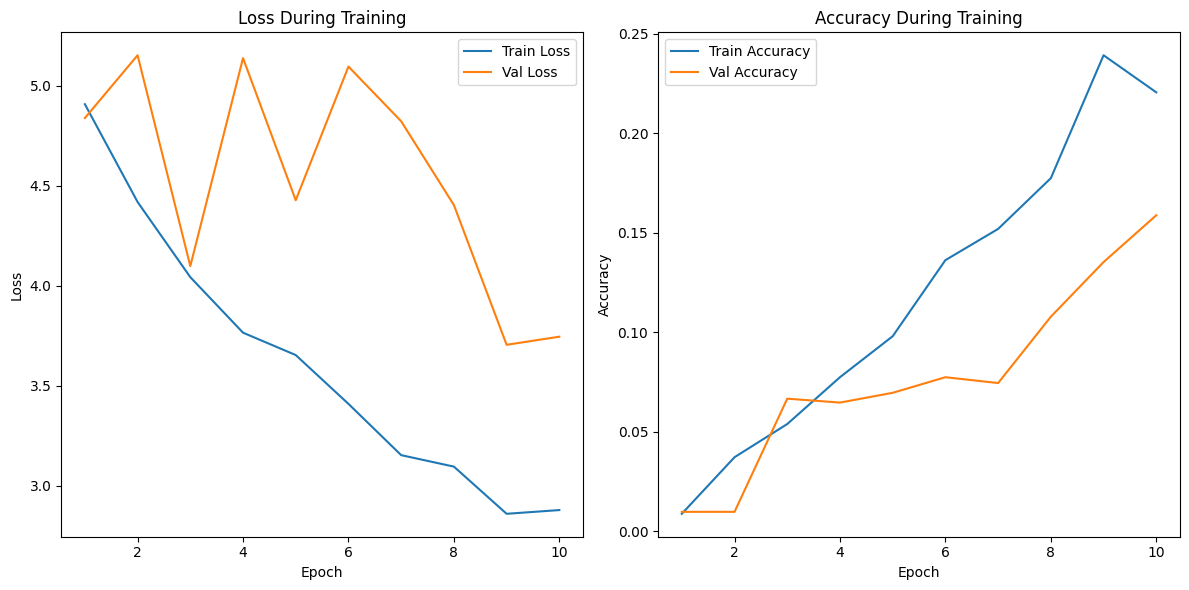

In [12]:
def initialize_weights(model):
    for layer in model.children():
        if isinstance(layer, (nn.Conv2d, nn.Linear)):
            nn.init.xavier_uniform_(layer.weight)
            if layer.bias is not None:
                nn.init.constant_(layer.bias, 0)

mobilenet_v2_random = models.mobilenet_v2(pretrained=False)

initialize_weights(mobilenet_v2_random)

mobilenet_v2_random.classifier[1] = nn.Linear(mobilenet_v2_random.last_channel, 102)  # 102 classes

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
mobilenet_v2_random.to(device)

# Train and evaluate
mobilenet_v2_random_train_loss, mobilenet_v2_random_val_loss, mobilenet_v2_random_train_acc, mobilenet_v2_random_val_acc = train_and_evaluate(
    mobilenet_v2_random, train_loader, val_loader, epochs=10, lr=0.001, num_classes=102
)


In [13]:
def evaluate(loader, model, criterion, dataset_name):
    model.eval()
    total_loss = 0
    correct = 0
    with torch.no_grad():
        with tqdm(total=len(loader), desc=f"Evaluating {dataset_name}", unit="batch") as pbar:
            for images, labels in loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                total_loss += loss.item()
                correct += (outputs.argmax(dim=1) == labels).sum().item()
                pbar.update(1)

    avg_loss = total_loss / len(loader)
    accuracy = correct / len(loader.dataset)
    print(f"{dataset_name} Loss: {avg_loss:.4f}, Accuracy: {accuracy:.4f}")
    return avg_loss, accuracy

# Evaluate on training, validation, and test sets
criterion = nn.CrossEntropyLoss()
train_loss, train_acc = evaluate(train_loader, mobilenet_v2_random, criterion, "Training")
val_loss, val_acc = evaluate(val_loader, mobilenet_v2_random, criterion, "Validation")
test_loss, test_acc = evaluate(test_loader, mobilenet_v2_random, criterion, "Test")

Evaluating Training: 100%|██████████| 32/32 [00:07<00:00,  4.21batch/s]


Training Loss: 2.5985, Accuracy: 0.2833


Evaluating Validation: 100%|██████████| 32/32 [00:06<00:00,  4.89batch/s]


Validation Loss: 3.7452, Accuracy: 0.1588


Evaluating Test: 100%|██████████| 193/193 [00:42<00:00,  4.54batch/s]

Test Loss: 4.0213, Accuracy: 0.1376


The accuracy of randomly initialized model is too lower than the pretrained one moreover, it's fluctuation and the training time is also so high. Therefore, the pretrained model is much more efficient.